In [1]:
include("./Functions.jl")
using .GPLM
using Random
using Plots
using LinearAlgebra
using Distributions
gr()

Plots.GRBackend()

In [2]:
k(x,x_)=(x[1]x_[1]+x[2]x_[2]+1)^2

k (generic function with 1 method)

In [3]:
Φ(x)=[x[1]^2 x[2]^2 (x[1] * x[2])*√2 x[1]*√2 x[2]*√2 1]

Φ (generic function with 1 method)

In [4]:
f(x)=[sin(x[1]) cos(x[2])]

f (generic function with 1 method)

In [5]:
n(x)=[0.1 0.05]
X,Y=GPLM.ToyData(f,2,2,min=0,max=π,messiness=n, N=100)

([2.1131839160070442 2.1012680509532764; 0.7346531850660939 0.021799446705758535; … ; 1.0580546840942788 2.006297453848048; 1.779334973579059 1.5545418681250882], [0.7370182667409464 -0.5040872964226338; 0.5218425263339573 1.0556424195640781; … ; 0.7920374031254074 -0.3919586740934947; 1.0480829281797115 0.13256500559162754])

In [6]:
Y[1,:]

2-element Array{Float64,1}:
  0.7370182667409464
 -0.5040872964226338

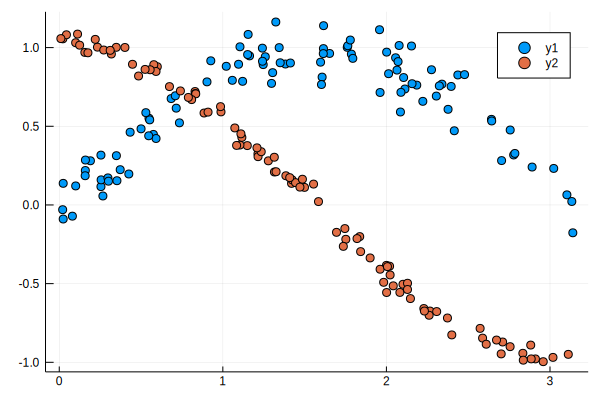

In [7]:
plot(X[:,1],Y[:,1],seriestype=:scatter)
plot!(X[:,2],Y[:,2],seriestype=:scatter)

In [8]:
K=zeros(size(Y,1),size(Y,1))
for i in 1:size(Y,1)
    for j in 1:i
        K[i,j]=K[j,i]
    end
    for j in i:size(Y,1)
        K[i,j]=(Φ(Y[i,:])Φ(Y[j,:])')[1]
    end
end

In [9]:
K

100×100 Array{Float64,2}:
 3.23029   0.726708    4.30701   2.26505   …  4.58204    3.17313   2.90918 
 0.726708  5.69634     0.353665  2.29575      0.286629   0.999101  2.84555 
 4.30701   0.353665    6.15854   2.52409      6.63989    4.12869   3.34023 
 2.26505   2.29575     2.52409   2.53559      2.58857    2.43178   3.28669 
 2.10952   1.07393     2.53437   1.79639      2.64003    2.12017   2.16848 
 0.365314  3.84569     0.110029  1.31546   …  0.0720815  0.499094  1.40133 
 1.30038   6.53232     0.900978  3.22951      0.820297   1.70364   4.30723 
 1.04693   0.646962    1.12431   0.863071     1.14251    1.0049    0.819852
 1.29668   1.66917     1.29706   1.51308      1.29776    1.368     1.72599 
 1.8641    5.38798     1.64333   3.43425      1.59655    2.26576   4.65886 
 2.54783   0.166001    3.52422   1.34959   …  3.7746     2.35046   1.53179 
 1.84597   0.506655    2.30253   1.27207      2.41637    1.76348   1.40194 
 0.852668  2.18623     0.682606  1.34422      0.646079   0.949

In [10]:
K_=zeros(size(Y,1),size(Y,1))
for i in 1:size(Y,1)
    for j in 1:size(Y,1)
        K_[i,j]=k(Y[i,:],Y[j,:])
    end
end

In [11]:
K_

100×100 Array{Float64,2}:
 3.23029   0.726708    4.30701   2.26505   …  4.58204    3.17313   2.90918 
 0.726708  5.69634     0.353665  2.29575      0.286629   0.999101  2.84555 
 4.30701   0.353665    6.15854   2.52409      6.63989    4.12869   3.34023 
 2.26505   2.29575     2.52409   2.53559      2.58857    2.43178   3.28669 
 2.10952   1.07393     2.53437   1.79639      2.64003    2.12017   2.16848 
 0.365314  3.84569     0.110029  1.31546   …  0.0720815  0.499094  1.40133 
 1.30038   6.53232     0.900978  3.22951      0.820297   1.70364   4.30723 
 1.04693   0.646962    1.12431   0.863071     1.14251    1.0049    0.819852
 1.29668   1.66917     1.29706   1.51308      1.29776    1.368     1.72599 
 1.8641    5.38798     1.64333   3.43425      1.59655    2.26576   4.65886 
 2.54783   0.166001    3.52422   1.34959   …  3.7746     2.35046   1.53179 
 1.84597   0.506655    2.30253   1.27207      2.41637    1.76348   1.40194 
 0.852668  2.18623     0.682606  1.34422      0.646079   0.949

In [12]:
G(x,x_,θ1,θ2)=θ1*exp(-(x-x_)*(x-x_)'/θ2)

G (generic function with 1 method)

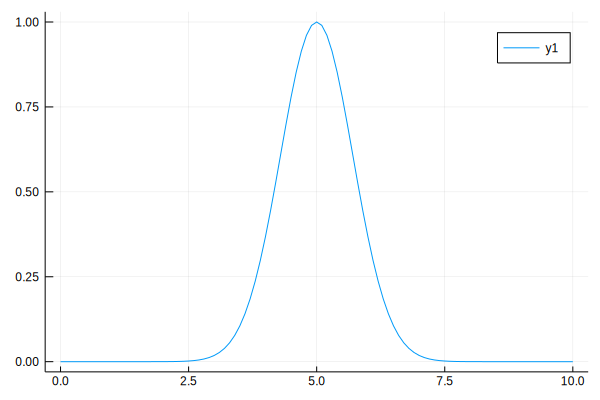

In [13]:
x=[i for i in 0:0.1:10]
x_=5
θ1=1
θ2=1
y=[G(i,x_,θ1,θ2) for i in x]
plot(x,y)

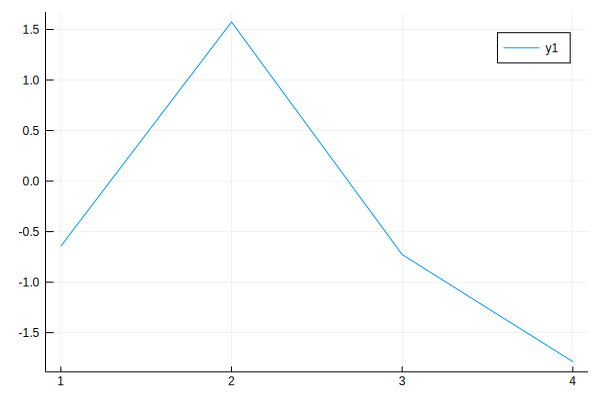

In [14]:
G(x,x_)=GPLM.GaussianKernel(x,x_,th1=1,th2=1)
x=[i for i in 1:1:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot(x,y)

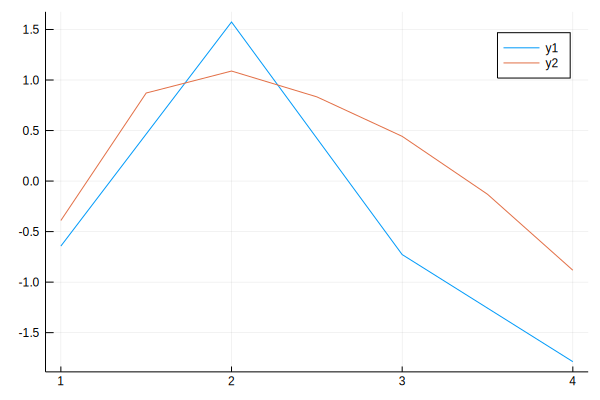

In [15]:
x=[i for i in 1:0.5:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot!(x,y)

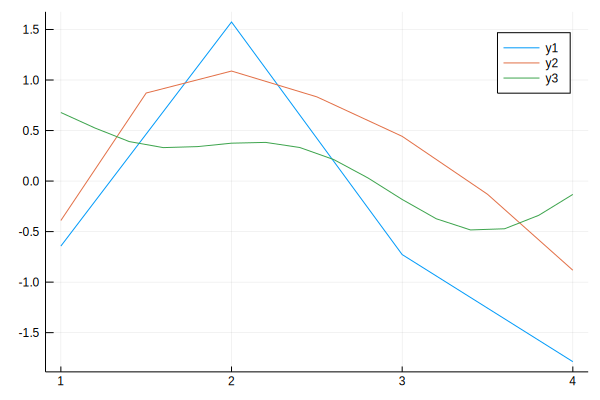

In [16]:
x=[i for i in 1:0.2:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot!(x,y)

In [17]:
X=vcat([[i i] for i in 1:0.2:4]...)
K=GPLM.KernelMatrix(X,G)


16×16 Array{Float64,2}:
 1.0       0.961558  0.863075  0.743376  …  0.500001  0.5       0.5     
 0.961558  1.0       0.961558  0.863075     0.500005  0.500001  0.5     
 0.863075  0.961558  1.0       0.961558     0.500031  0.500005  0.500001
 0.743376  0.863075  0.961558  1.0          0.500168  0.500031  0.500005
 0.639019  0.743376  0.863075  0.961558     0.500767  0.500168  0.500031
 0.567668  0.639019  0.743376  0.863075  …  0.502988  0.500767  0.500168
 0.528067  0.567668  0.639019  0.743376     0.509921  0.502988  0.500767
 0.509921  0.528067  0.567668  0.639019     0.528067  0.509921  0.502988
 0.502988  0.509921  0.528067  0.567668     0.567668  0.528067  0.509921
 0.500767  0.502988  0.509921  0.528067     0.639019  0.567668  0.528067
 0.500168  0.500767  0.502988  0.509921  …  0.743376  0.639019  0.567668
 0.500031  0.500168  0.500767  0.502988     0.863075  0.743376  0.639019
 0.500005  0.500031  0.500168  0.500767     0.961558  0.863075  0.743376
 0.500001  0.500005  0.5000

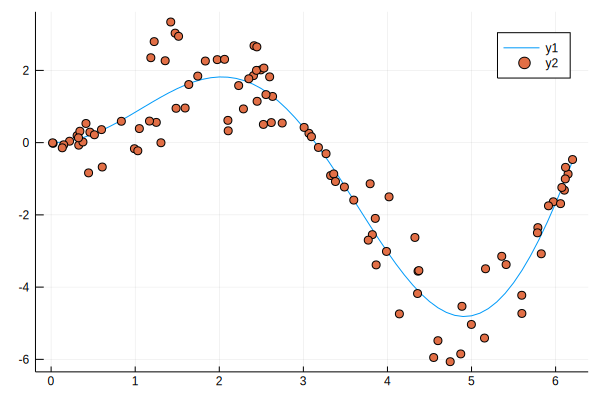

In [26]:
f(x)=x[1]*sin(x[1])
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
n(x)=[sin(x[1])]
plot(x,y)
X,Y=GPLM.ToyData(f,1,1,min=0,max=2π,messiness=n,N=100)
plot!(X,Y,seriestype=:scatter)

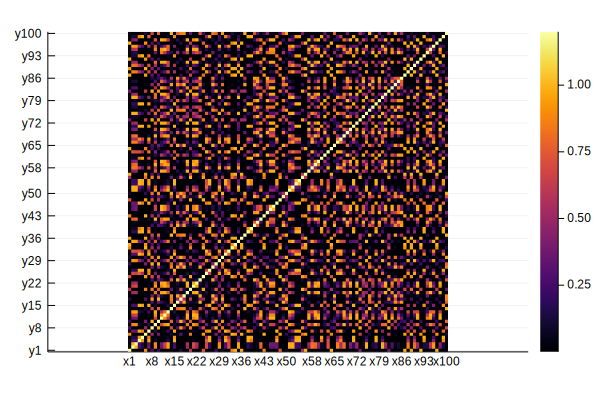

In [27]:
k(x,x_,)=GPLM.GaussianKernel(x,x_,;th1=1,th2=1)
K=GPLM.KernelMatrix(X,k,observationn_noise=0.2)
# heatmap(K)
xs = [string("x", i) for i = 1:100]
ys = [string("y", i) for i = 1:100]
heatmap(xs, ys, K, aspect_ratio=1)

In [28]:
yy=inv(K)*Y

100-element Array{Float64,1}:
  0.63902473672485   
 -4.674854614421551  
 -1.5688829842023628 
  1.6342487110502077 
  0.2149470721800876 
 -3.5374997847378324 
 -3.584989697588788  
 -0.1376002265798676 
  1.9617842012440816 
 -3.8917685085295304 
  2.559723284715237  
 -3.7628138481460063 
  1.5160301006518988 
  ⋮                  
  1.220739234727285  
 -2.7799939292250513 
 -1.8721086631130783 
  2.184862252612642  
 -0.42411369492220935
  0.35319781623163277
  0.7074116802695564 
  3.4908950764502618 
  0.6386532585431457 
  3.2566586888371623 
 -0.8766250345030081 
  3.1689381479981833 

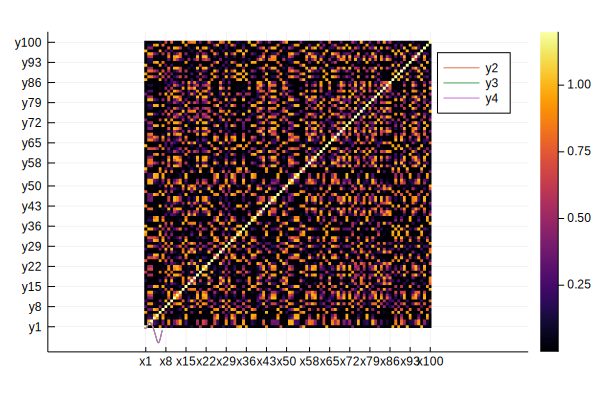

In [29]:
μ=[]
σ=[]
for i in 0:0.1:2π
    k_=[k(j,i) for j in X]
    s=k(i,i)
    mu=(k_'*yy)[1]
    var=s-(k_'*inv(K)*k_)[1]
    push!(μ,mu)
    push!(σ,var)
end
plot!(0:0.1:2π,μ)
plot!(0:0.1:2π,μ+σ)
plot!(0:0.1:2π,μ-σ)

In [30]:
σ

63-element Array{Any,1}:
 0.048973290426117866
 0.028602054913143493
 0.01811666512197052 
 0.014296204713941885
 0.014437862412616465
 0.016495646504093298
 0.019006018145365955
 0.0209697302697599  
 0.02179813542418696 
 0.021322464340312042
 0.0197881720768861  
 0.017759023964586285
 0.015921394520835408
 ⋮                   
 0.026483961468172668
 0.026781001718643505
 0.02691353347194758 
 0.026823773371371318
 0.026351417154772183
 0.02522627277739964 
 0.023193037369561353
 0.02031604257593711 
 0.01741894499412977 
 0.01649626754371525 
 0.02086059994239764 
 0.03482597713399638 

In [31]:
(μ,σ,K,K_,yy)=GPLM.GaussianProcessRegression(X,Y,k,x_test=[i for i in 0:0.1:2π],observationn_noise=0.01)

(Any[-0.08040519536300295, 0.05047497764040543, 0.10265126987447104, 0.08373200388720647, 0.017084360580454927, -0.06186625145071645, -0.11236290264049131, -0.09680088825878386, 0.010876845953035286, 0.21886920955387268  …  -4.2293099985844265, -3.9511298451201924, -3.682645809842114, -3.4076544408385985, -3.1000869410036103, -2.7321317777754075, -2.282796891158256, -1.744763942502658, -1.12794145894145, -0.459039905832924], Any[0.06448453141809792, 0.04204613501689097, 0.03312096776654784, 0.03030562631670258, 0.029952490739639164, 0.03215546592890179, 0.03612541702291789, 0.039725351057285495, 0.04128847016501835, 0.04034844797645332  …  0.043423695271916786, 0.043313065468869004, 0.042242230151174294, 0.04074921264253831, 0.0395999175639599, 0.03871405157052412, 0.03672342644279285, 0.03294198135781081, 0.0339377341546529, 0.054742752232879006], [1.01 9.805933238411008e-10 … 1.9297885081094235e-16 0.042906242154107675; 9.805933238411008e-10 1.01 … 0.11834398957841705 0.0004402334325

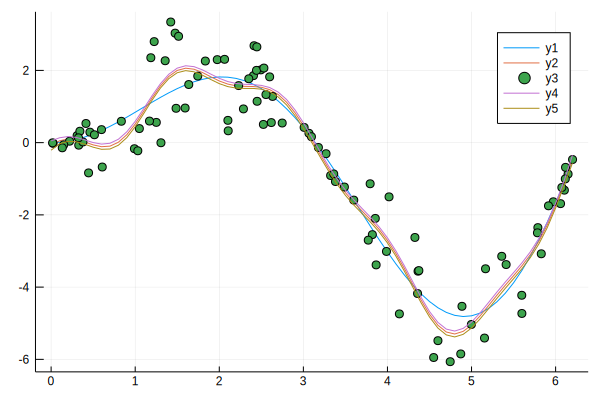

In [32]:
x_test=[i for i in 0:0.1:2π]
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
plot(x,y)
plot!(x_test,μ)
plot!(X,Y,seriestype=:scatter)
plot!(x_test,μ+2 .*σ)
plot!(x_test,μ-2 .*σ)


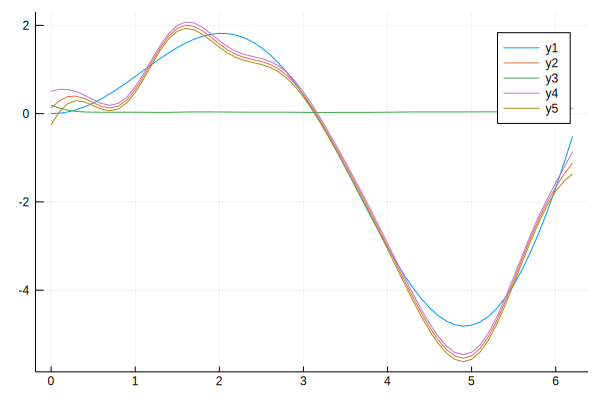

In [25]:
plot(x,y)
plot!(x_test,μ)
plot!(x_test,σ)
plot!(x_test,μ+2 .*σ)
plot!(x_test,μ-2 .*σ)